In [2]:
from single_preprocessing_function import single_preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [48]:
#import pre processed data using our previous built function
X, y, ticker, delay, lag = single_preprocessing(ticker='SPLK', delay=15, lag=2)

#We can confirm which ticker is configured by default by our function
print(ticker)

SPLK


c:\Users\kurom\Desktop\AI_GBC\S2\DL_I\Final_Project\single_preprocessing_function.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_y = [ y[i+delay+lag] for i in range(0, (y.shape[0]-(delay+lag)), delay)]


In [49]:
X.shape

(197, 15, 4)

In [50]:
y.shape

(196,)

In [51]:
X = X[:-1]

## Before designing the RNN first let's split our data into a train/test split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [53]:
X_train.shape

(124, 15, 4)

In [54]:
X_test.shape

(40, 15, 4)

In [55]:
X_val.shape

(32, 15, 4)

### Making a baseline

In [56]:
#Build a baseline ANN densely connected so that we can compare how LSTM y is better

In [57]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(delay, X_train.shape[-1])))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(X_train, y_train, steps_per_epoch=150, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
150/150 [==============================] - 1s 2ms/step - loss: 91.2815 - val_loss: 104.9043
Epoch 2/20
150/150 [==============================] - 0s 2ms/step - loss: 84.4962 - val_loss: 104.7543
Epoch 3/20
150/150 [==============================] - 0s 3ms/step - loss: 86.6728 - val_loss: 104.6043
Epoch 4/20
150/150 [==============================] - 0s 2ms/step - loss: 91.1845 - val_loss: 104.4543
Epoch 5/20
150/150 [==============================] - 0s 2ms/step - loss: 86.8352 - val_loss: 104.3043
Epoch 6/20
150/150 [==============================] - 0s 1ms/step - loss: 89.5910 - val_loss: 104.1543
Epoch 7/20
150/150 [==============================] - 0s 2ms/step - loss: 86.9785 - val_loss: 104.0043
Epoch 8/20
150/150 [==============================] - 0s 2ms/step - loss: 87.5408 - val_loss: 103.8543
Epoch 9/20
150/150 [==============================] - 0s 2ms/step - loss: 89.3826 - val_loss: 103.7043
Epoch 10/20
150/150 [==============================] - 0s 2ms/step - loss

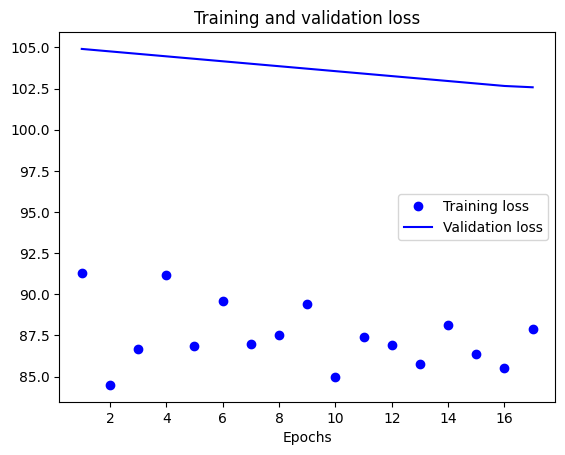

In [58]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [59]:
predicted_stock_price = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


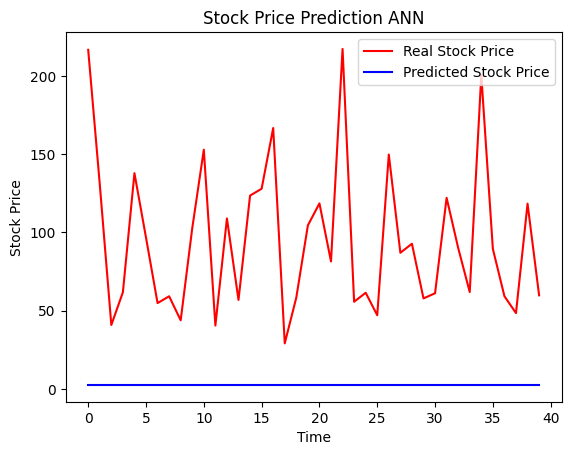

In [60]:
plt.plot(y_test, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction ANN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [61]:
#Evaluate regression model using mse
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predicted_stock_price)

10853.031804562208

In [62]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, predicted_stock_price)

0.9665741395302432

In [ ]:
#So we can see that a normal ANN does not make a good job at predicting the closure price of stocks, well we should define what a good job and bad job is, so we see that
# The mean squared error of the predictions is 108 USD and also the mean absolute percentage error is around 10% which is actually not that good if we will try to predict stocks
# that 10% percent difference can mean that you win a lot of money or lose a lot of it...
# To create a model that performs better let's implement LSTM

In [19]:
data

array([[[0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9],
        [1. ]]])

In [24]:
data[0][0]

array([0.1])